# Async Exercise: Health sites near you

Your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

- How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?
    - Metro Manila
    - Aklan

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

## Imports

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Change Directory

In [2]:
os.chdir('C:\\Users\\richa\\OneDrive - De La Salle University - Manila\\AY 2021\\Term 2\\DATAPRE\\Activities\\healthSites')
os.getcwd()

'C:\\Users\\richa\\OneDrive - De La Salle University - Manila\\AY 2021\\Term 2\\DATAPRE\\Activities\\healthSites'

## Initial Reading and Testing of Main Geodataframe

### Map Reading

In [3]:
# Read shapefile and names of provinces
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

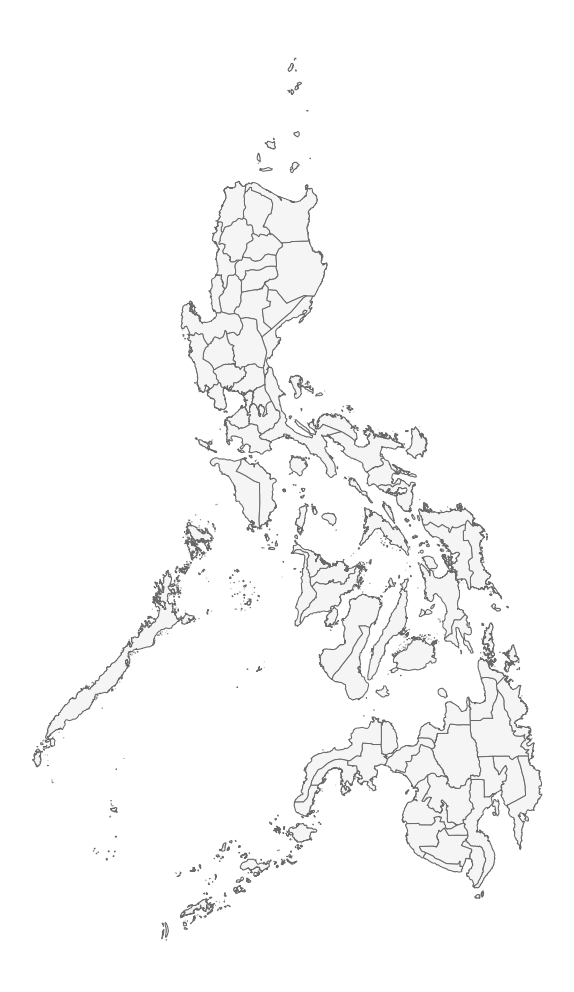

In [4]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

### Healthsites Reading

In [5]:
# Read GeoJSON file
healthsites = gpd.read_file('philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### Checking of Projection

In [6]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


In [7]:
healthsites.describe(include=np.object)

<ipython-input-7-6f105f861a18>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  healthsites.describe(include=np.object)


,osm_type,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,insurance,staff_doctors,contact_number,...,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag
count,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,...,10405,10365,10405,10405,10405,10405,10405,10405,1,1
unique,2,1,9,98,1668,873,5,2,2,332,...,2,1667,4,7,2,26,53,16,1,1
top,node,,pharmacy,,,,,,,,...,,GOwin,,,,,,,0,"drugs, prescription, medical supplies, first-aid"
freq,7481,10405,4078,10043,7014,9311,9868,10404,10404,10069,...,10404,1904,10327,10399,10404,9647,6405,9330,1,1


In [8]:
healthsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

### Plot Testing of Health-related Amenities in Philippines

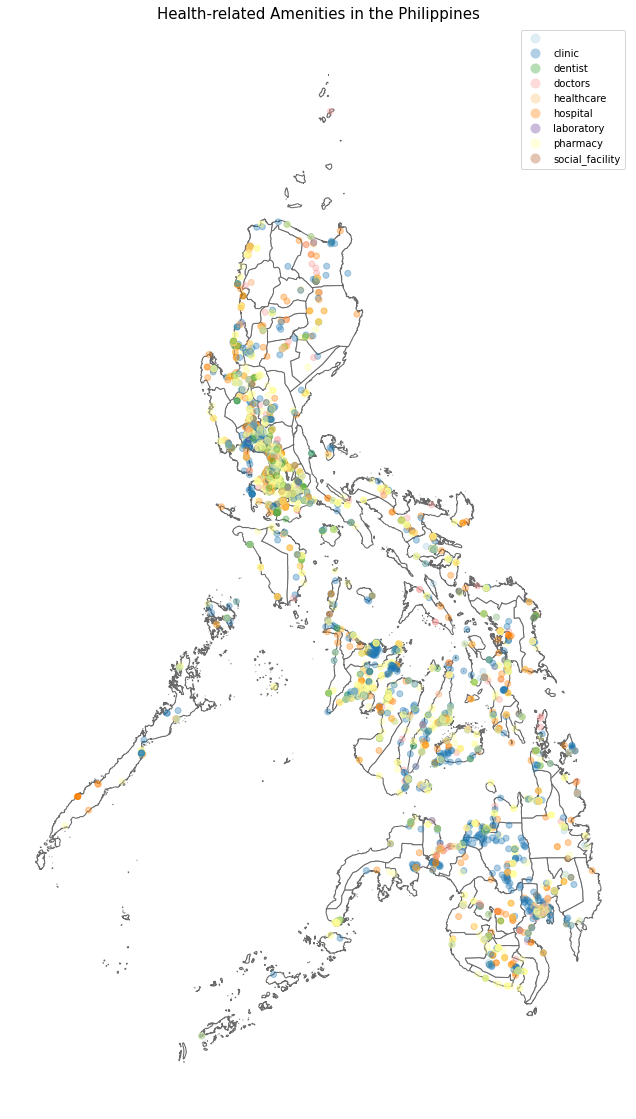

In [9]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

## Merging of the two Geodataframes

In [10]:
amenities_within = gpd.sjoin(healthsites, ph, op='within')
amenities_within.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
200,4196852283,node,6.0,,clinic,,,,,39446699.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
225,4900961821,node,9.0,,clinic,,,,,49324674.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
402,4728751605,node,9.0,,pharmacy,,,,,46755569.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II
405,4812503217,node,9.0,,clinic,,,,,55569745.0,...,PHL,Philippines,PHL.36_1,Iloilo,None,None,Lalawigan|Probinsya,Province,630,PH.II


### Unique Amenity Values

In [11]:
healthsites.amenity.unique()

array(['pharmacy', 'doctors', 'hospital', 'clinic', 'dentist', '',
       'laboratory', 'social_facility', 'healthcare'], dtype=object)

## Metro Manila Plotting

### Metro Manila Plots and Maps Preparation

In [12]:
mm_map = ph[ph.NAME_1=="Metropolitan Manila"]
mm_amenities = amenities_within[amenities_within.NAME_1=="Metropolitan Manila"]
mm_pharmacy = mm_amenities[mm_amenities.amenity=="pharmacy"]
mm_doctors = mm_amenities[mm_amenities.amenity=="doctors"]
mm_hospital = mm_amenities[mm_amenities.amenity=="hospital"]
mm_clinic = mm_amenities[mm_amenities.amenity=="clinic"]
mm_dentist = mm_amenities[mm_amenities.amenity=="dentist"]
mm_laboratory = mm_amenities[mm_amenities.amenity=="laboratory"]
mm_sf = mm_amenities[mm_amenities.amenity=="social_facility"]
mm_healthcare = mm_amenities[mm_amenities.amenity=="healthcare"]

mm_summary = mm_amenities["amenity"].value_counts().rename_axis('amenity').reset_index(name='counts')
mm_summary

,amenity,counts
0,pharmacy,957
1,clinic,532
2,hospital,286
3,dentist,228
4,,160
5,doctors,53
6,healthcare,1


### Metro Manila Plot Making Proper

(120.906190108, 121.14282875200001, 14.327678826, 14.802912574)

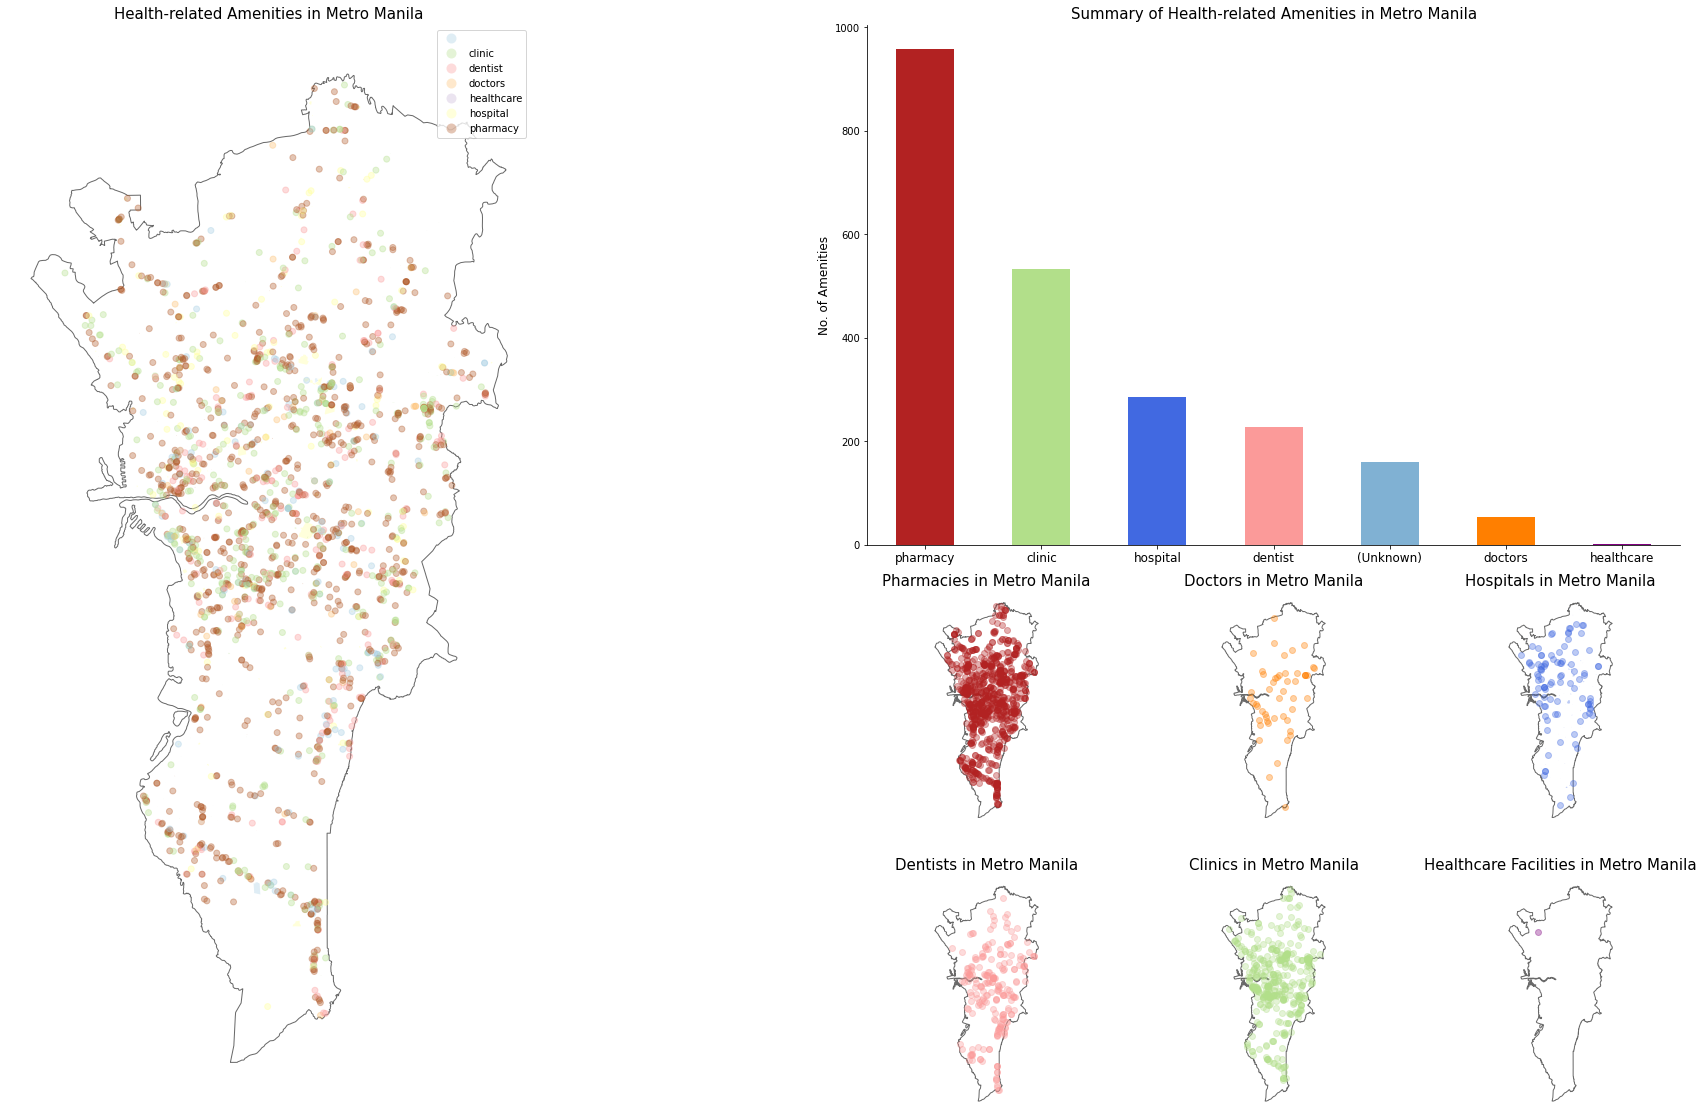

In [13]:
#Dentists
fig = plt.figure(figsize=(30, 20))
ax = fig.add_gridspec(4,6)
ax1 = fig.add_subplot(ax[0:, 0:2])
axsummary = fig.add_subplot(ax[0:2, 3:])
ax2 = fig.add_subplot(ax[2, 3])
ax3 = fig.add_subplot(ax[2, 4])
ax4 = fig.add_subplot(ax[2, 5])
ax5 = fig.add_subplot(ax[3, 3])
ax6 = fig.add_subplot(ax[3, 4])
ax7 = fig.add_subplot(ax[3, 5])

#Metro Manila amenities map
mm_map.plot(ax=ax1, color='white', edgecolor='dimgray')
mm_amenities.plot(ax=ax1, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax1.set_title('Health-related Amenities in Metro Manila', fontsize=15)
ax1.axis('off')

#Bar chart of amenities in Metro Manila
axsummary = mm_summary['counts'].plot(ax=axsummary, kind='bar', color=["#B22222", "#b2df8a", "#4169e1", "#fb9a99", "#80b1d3", "#ff7f00", "#800080"], width=0.5)

axsummary.set_xticklabels(['pharmacy', 'clinic', 'hospital', 'dentist', '(Unknown)', 'doctors', 'healthcare'], rotation=0, fontsize=12)
axsummary.set_title('Summary of Health-related Amenities in Metro Manila', fontsize=15)
axsummary.set_ylabel('No. of Amenities', fontsize=12);

axsummary.spines['right'].set_visible(False)
axsummary.spines['top'].set_visible(False)
axsummary.xaxis.grid(False)

#Pharmacies in Metro Manila
mm_map.plot(ax=ax2, color='white', edgecolor='dimgray')
mm_pharmacy.plot(ax=ax2, color="#B22222", alpha=0.35, legend=True)
ax2.set_title('Pharmacies in Metro Manila', fontsize=15)
ax2.axis('off')

#Doctors in Metro Manila
mm_map.plot(ax=ax3, color='white', edgecolor='dimgray')
mm_doctors.plot(ax=ax3, color="#ff7f00", alpha=0.35, legend=True)
ax3.set_title('Doctors in Metro Manila', fontsize=15)
ax3.axis('off')

#Hospitals in Metro Manila
mm_map.plot(ax=ax4, color='white', edgecolor='dimgray')
mm_hospital.plot(ax=ax4, color="#4169e1", alpha=0.35, legend=True)
ax4.set_title('Hospitals in Metro Manila', fontsize=15)
ax4.axis('off')

#Dentists in Metro Manila
mm_map.plot(ax=ax5, color='white', edgecolor='dimgray')
mm_dentist.plot(ax=ax5, color="#fb9a99", alpha=0.35, legend=True)
ax5.set_title('Dentists in Metro Manila', fontsize=15)
ax5.axis('off')

#Clinics in Metro Manila
mm_map.plot(ax=ax6, color='white', edgecolor='dimgray')
mm_clinic.plot(ax=ax6, color="#b2df8a", alpha=0.35, legend=True)
ax6.set_title('Clinics in Metro Manila', fontsize=15)
ax6.axis('off')

#Health Care Facilities in Metro Manila
mm_map.plot(ax=ax7, color='white', edgecolor='dimgray')
mm_healthcare.plot(ax=ax7, color="#800080", alpha=0.35, legend=True)
ax7.set_title('Healthcare Facilities in Metro Manila', fontsize=15)
ax7.axis('off')

### Saving to PNG

In [14]:
#Save as PNG Metro Manila Plot
fig.savefig('Metro Manila.png', bbox_inches='tight')

## Aklan Plotting

### Aklan Plots and Maps Preparation

In [15]:
aklan_map = ph[ph.NAME_1=="Aklan"]
aklan_amenities = amenities_within[amenities_within.NAME_1=="Aklan"]
aklan_pharmacy = aklan_amenities[aklan_amenities.amenity=="pharmacy"]
aklan_doctors = aklan_amenities[aklan_amenities.amenity=="doctors"]
aklan_hospital = aklan_amenities[aklan_amenities.amenity=="hospital"]
aklan_clinic = aklan_amenities[aklan_amenities.amenity=="clinic"]
aklan_dentist = aklan_amenities[aklan_amenities.amenity=="dentist"]
aklan_laboratory = aklan_amenities[aklan_amenities.amenity=="laboratory"]
aklan_sf = aklan_amenities[aklan_amenities.amenity=="social_facility"]
aklan_healthcare = aklan_amenities[aklan_amenities.amenity=="healthcare"]

aklan_summary = aklan_amenities["amenity"].value_counts().rename_axis('amenity').reset_index(name='counts')
aklan_summary

,amenity,counts
0,clinic,13
1,hospital,13
2,pharmacy,12
3,doctors,3
4,dentist,2
5,,1


### Aklan Plot Making Proper

(121.8066558855, 122.61483764450001, 11.278166485, 12.033503815)

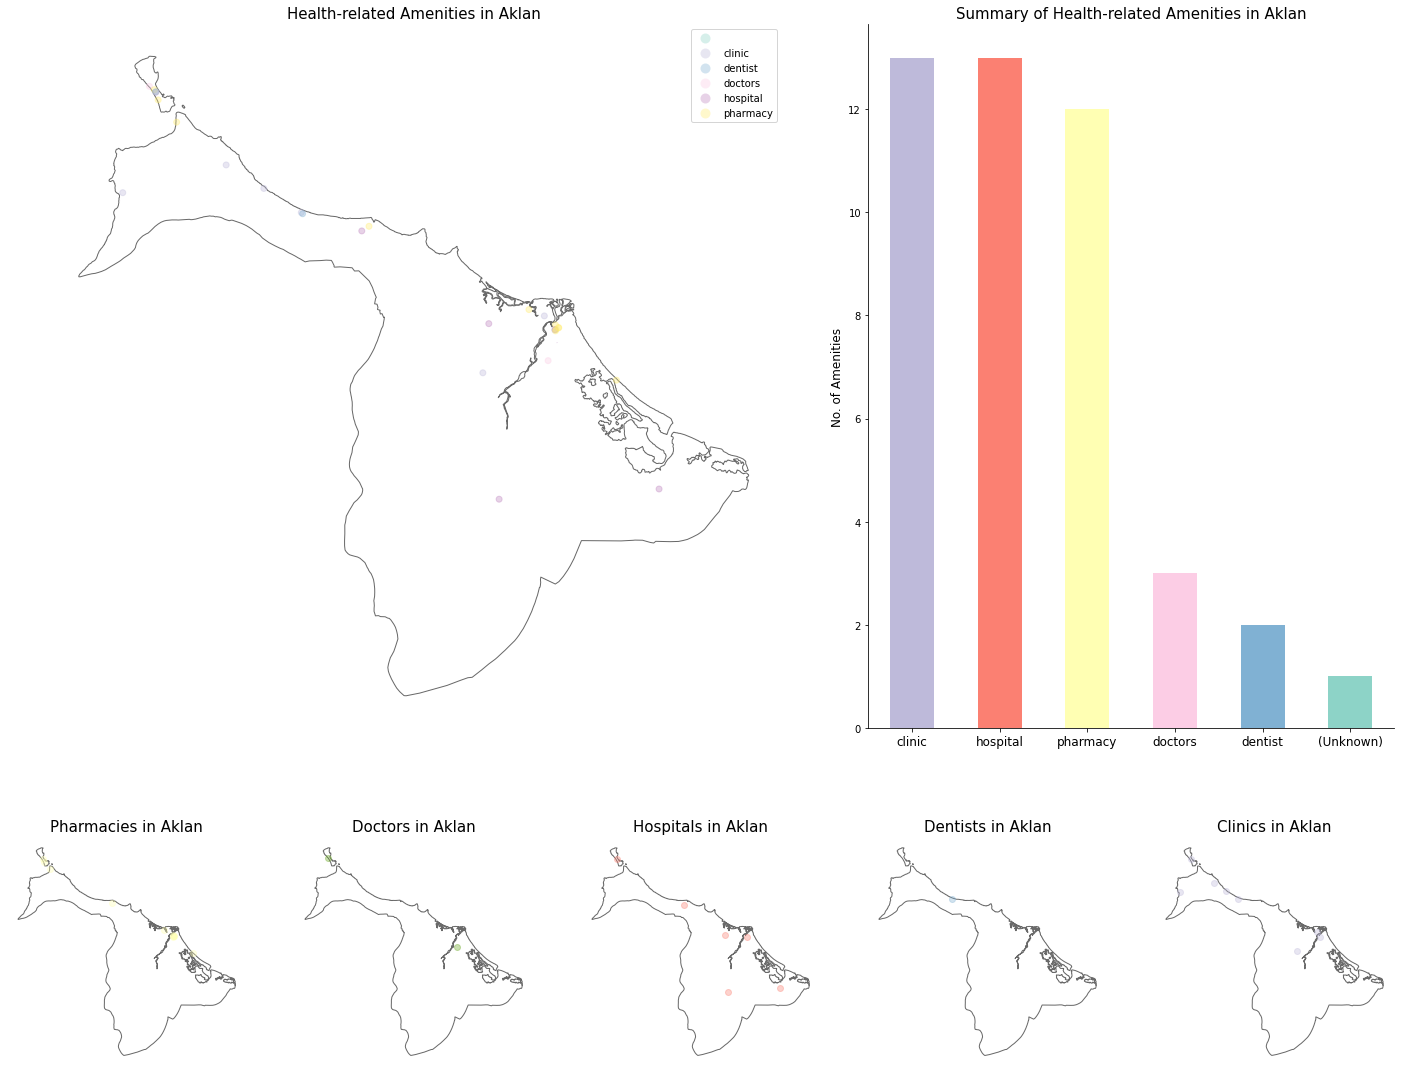

In [16]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_gridspec(3,6)
ax1 = fig.add_subplot(ax[0:2, 0:3])
ax7 = fig.add_subplot(ax[0:2, 3:5])
ax2 = fig.add_subplot(ax[2, 0])
ax3 = fig.add_subplot(ax[2, 1])
ax4 = fig.add_subplot(ax[2, 2])
ax5 = fig.add_subplot(ax[2, 3])
ax6 = fig.add_subplot(ax[2, 4])

#Aklan amenities map
aklan_map.plot(ax=ax1, color='white', edgecolor='dimgray')
aklan_amenities.plot(ax=ax1, column="amenity", cmap="Set3", alpha=0.35, legend=True)
ax1.set_title('Health-related Amenities in Aklan', fontsize=15)
ax1.axis('off')

#Bar chart of amenities in Aklan
ax7 = aklan_summary['counts'].plot(ax=ax7, kind='bar', color=["#bebada", "#fb8072", "#ffffb3", "#fccde5", "#80b1d3", "#8dd3c7"], width=0.5)

ax7.set_xticklabels(['clinic', 'hospital', 'pharmacy', 'doctors', 'dentist', '(Unknown)'], rotation=0, fontsize=12)
ax7.set_title('Summary of Health-related Amenities in Aklan', fontsize=15)
ax7.set_ylabel('No. of Amenities', fontsize=12);

ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.xaxis.grid(False)

#Pharmacies in Aklan
aklan_map.plot(ax=ax2, color='white', edgecolor='dimgray')
aklan_pharmacy.plot(ax=ax2, color="#ffffb3", alpha=0.35, legend=True)
ax2.set_title('Pharmacies in Aklan', fontsize=15)
ax2.axis('off')

#Doctors in Aklan
aklan_map.plot(ax=ax3, color='white', edgecolor='dimgray')
aklan_doctors.plot(ax=ax3, color="#66a61e", alpha=0.35, legend=True)
ax3.set_title('Doctors in Aklan', fontsize=15)
ax3.axis('off')

#Hospitals in Aklan
aklan_map.plot(ax=ax4, color='white', edgecolor='dimgray')
aklan_hospital.plot(ax=ax4, color="#fb8072", alpha=0.35, legend=True)
ax4.set_title('Hospitals in Aklan', fontsize=15)
ax4.axis('off')

#Dentists in Aklan
aklan_map.plot(ax=ax5, color='white', edgecolor='dimgray')
aklan_dentist.plot(ax=ax5, color="#80b1d3", alpha=0.35, legend=True)
ax5.set_title('Dentists in Aklan', fontsize=15)
ax5.axis('off')

#Clinics in Aklan
aklan_map.plot(ax=ax6, color='white', edgecolor='dimgray')
aklan_clinic.plot(ax=ax6, color="#bebada", alpha=0.35, legend=True)
ax6.set_title('Clinics in Aklan', fontsize=15)
ax6.axis('off')

### Saving to PNG

In [17]:
#Save as PNG Aklan Plot
fig.savefig('Aklan.png', bbox_inches='tight')

## Draft/Testing Codes

### Metro Manila

(120.906190108, 121.14282875200001, 14.327678826, 14.802912574)

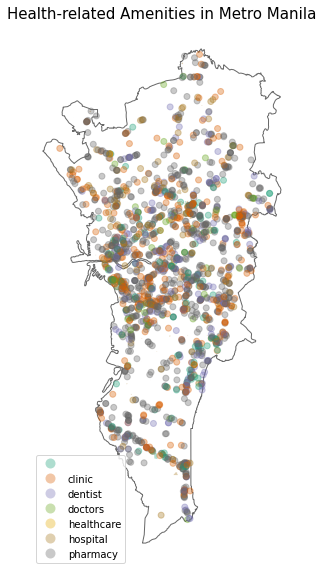

In [27]:
# All Amenities
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenities.plot(ax=ax, column="amenity", cmap="Dark2", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Metro Manila', fontsize=15)
ax.axis('off')

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

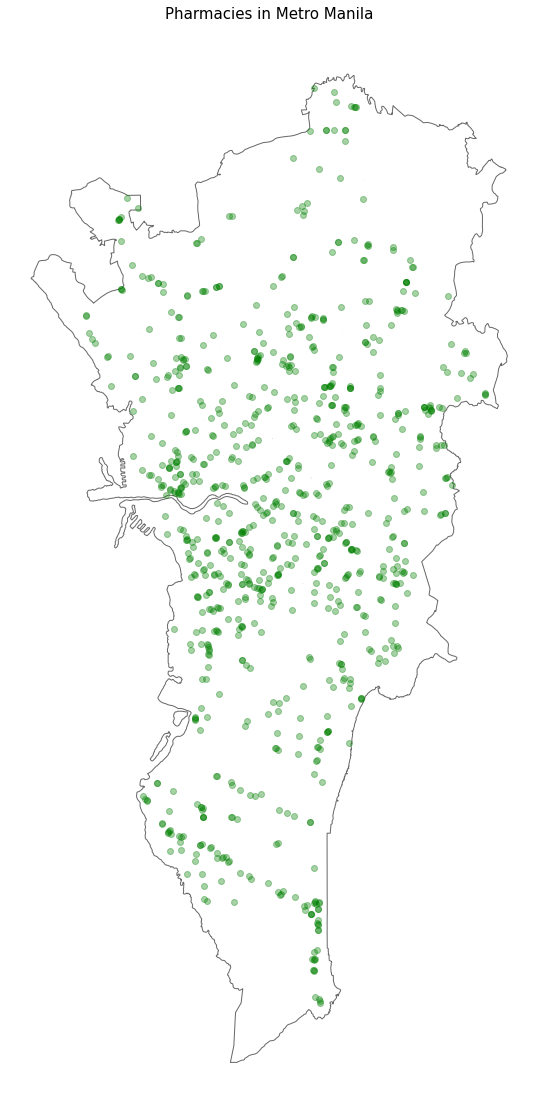

In [28]:
#Pharmacy
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_pharmacy.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off')

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

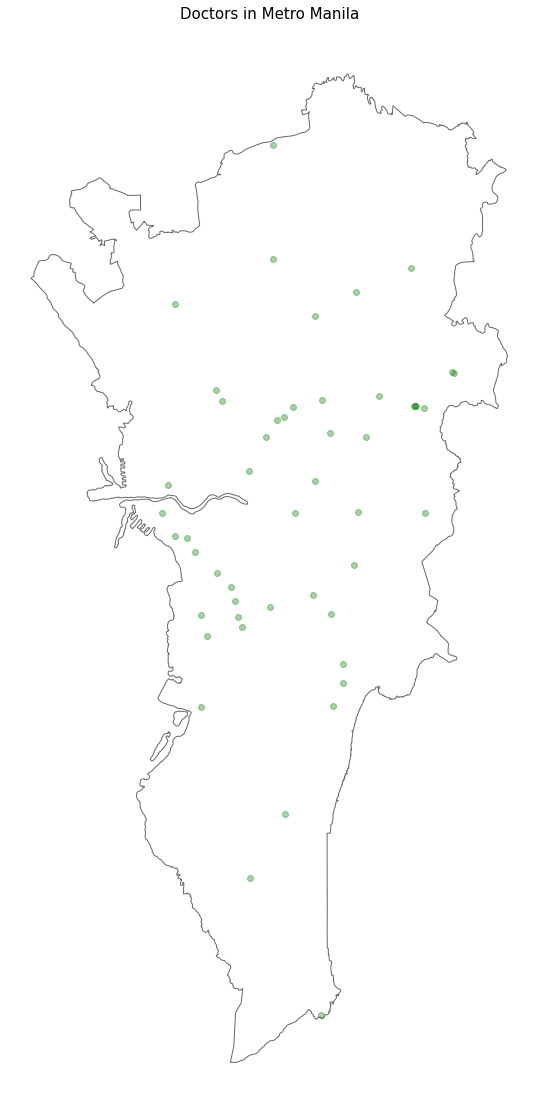

In [29]:
#Doctors
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_doctors.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off')

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

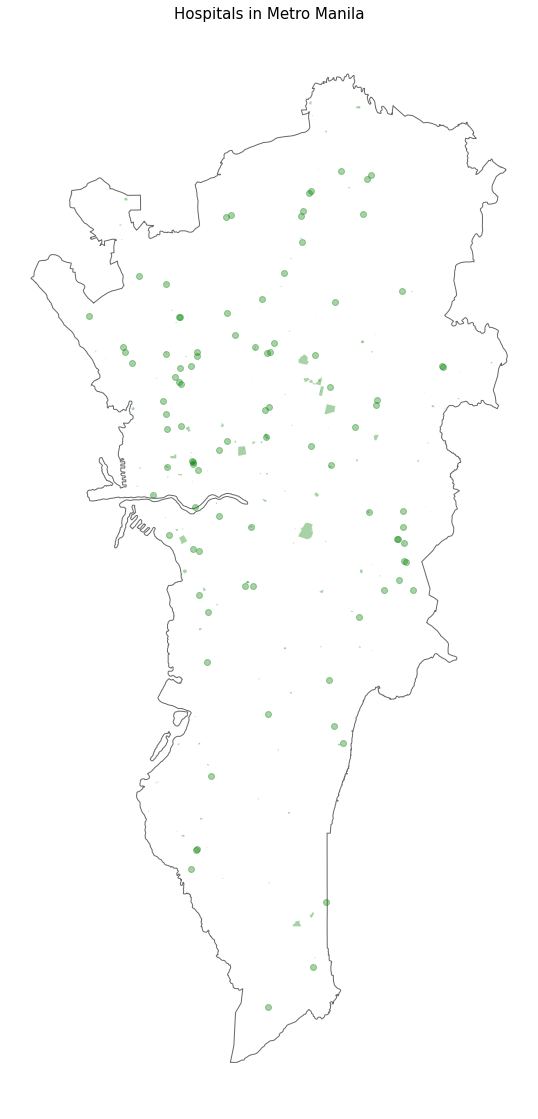

In [30]:
#Hospitals
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_hospital.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Hospitals in Metro Manila', fontsize=15)
ax.axis('off')

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

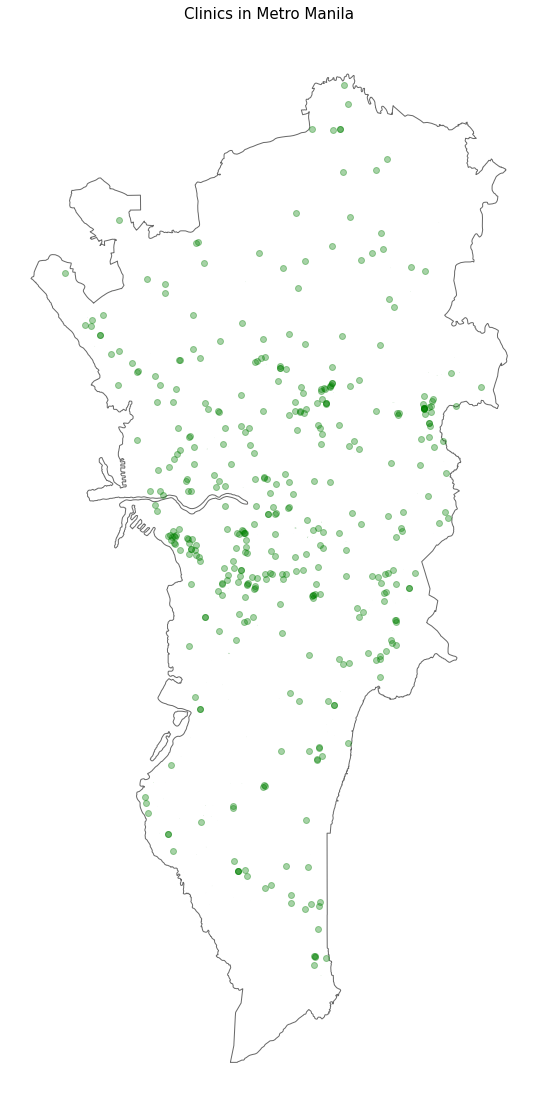

In [31]:
#Clinics
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_clinic.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off')

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

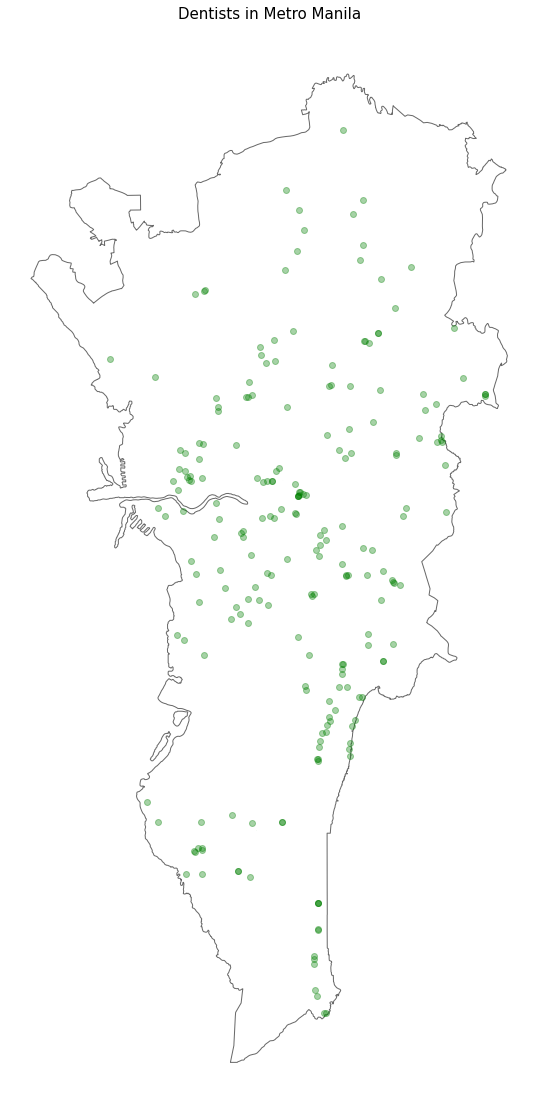

In [32]:
#Dentists
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_dentist.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off')

In [33]:
#Laboratories - NONE!
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_laboratory.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Laboratories in Metro Manila', fontsize=15)
ax.axis('off')

c:\users\richa\appdata\local\programs\python\python39\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 2160x1440 with 1 Axes>

In [34]:
#Social Facilities - NONE!
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_sf.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Social Facilities in Metro Manila', fontsize=15)
ax.axis('off')

c:\users\richa\appdata\local\programs\python\python39\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 2160x1440 with 1 Axes>

(120.90619010799998, 121.142828752, 14.327678826, 14.802912574)

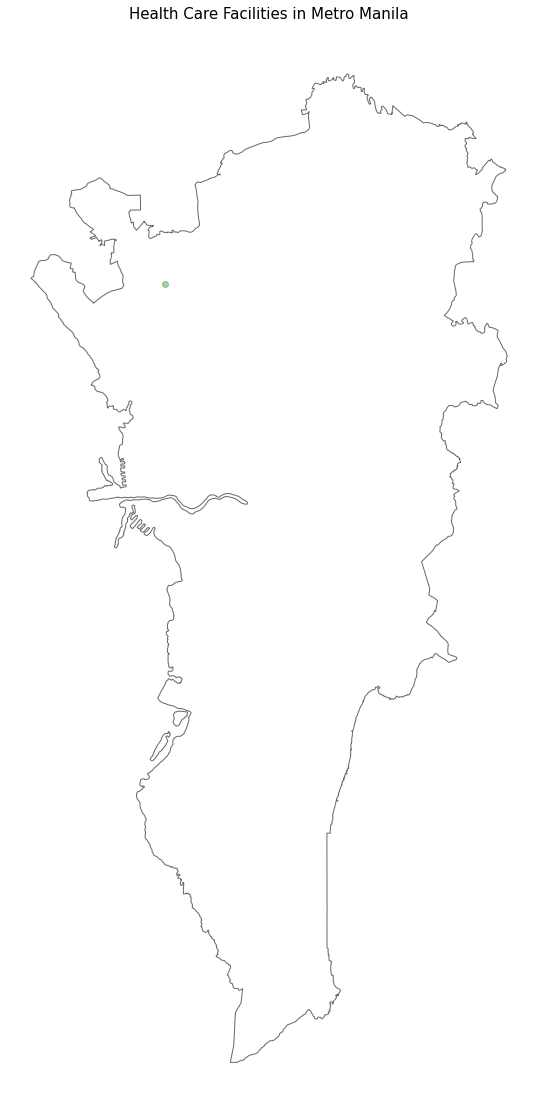

In [35]:
#Health Care
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

mm_map.plot(ax=ax, color='white', edgecolor='dimgray')
mm_healthcare.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Health Care Facilities in Metro Manila', fontsize=15)
ax.axis('off')

### Aklan

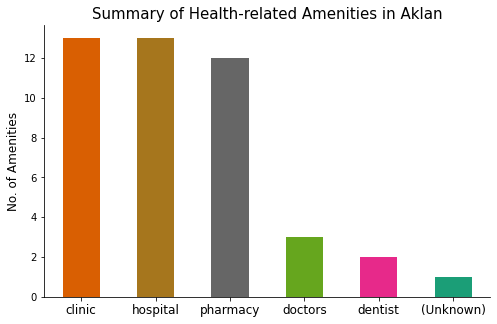

In [36]:
ax9 = aklan_summary['counts'].plot(figsize=(8, 5), kind='bar', color=["#d95f02", "#a6761d", "#666666", "#66a61e", "#e7298a", "#1b9e77"], width=0.5)

ax9.set_xticklabels(['clinic', 'hospital', 'pharmacy', 'doctors', 'dentist', '(Unknown)'], rotation=0, fontsize=12)
ax9.set_title('Summary of Health-related Amenities in Aklan', fontsize=15)
ax9.set_ylabel('No. of Amenities', fontsize=12);

ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.xaxis.grid(False)

(121.8066558855, 122.6148376445, 11.278166485, 12.033503814999998)

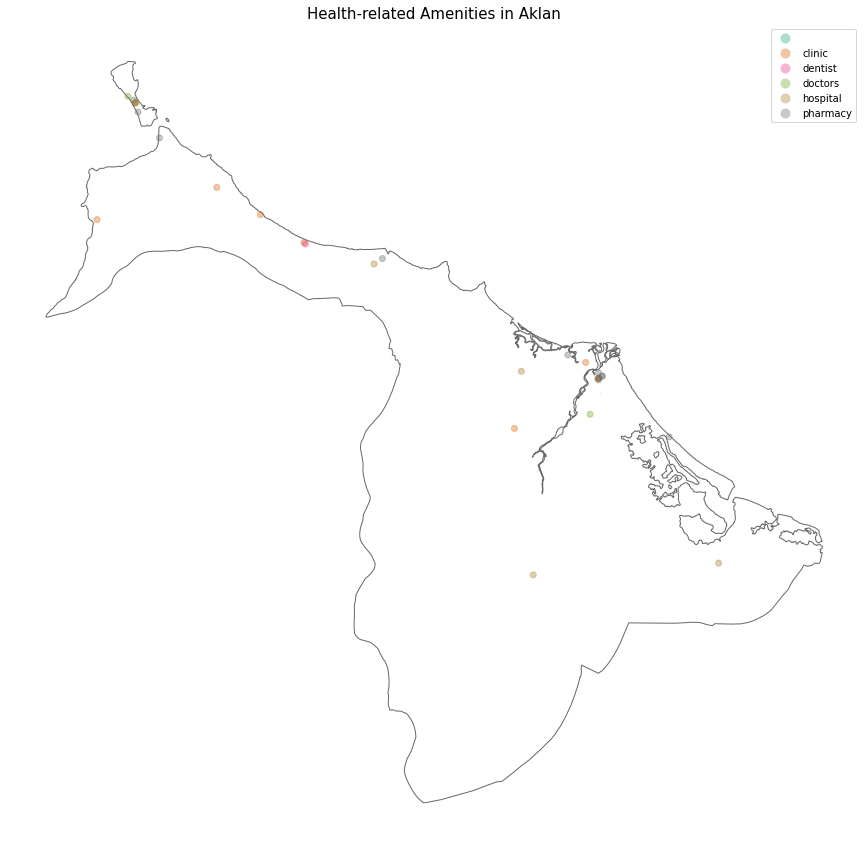

In [37]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_amenities.plot(ax=ax, column="amenity", cmap="Dark2", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in Aklan', fontsize=15)
ax.axis('off')

(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

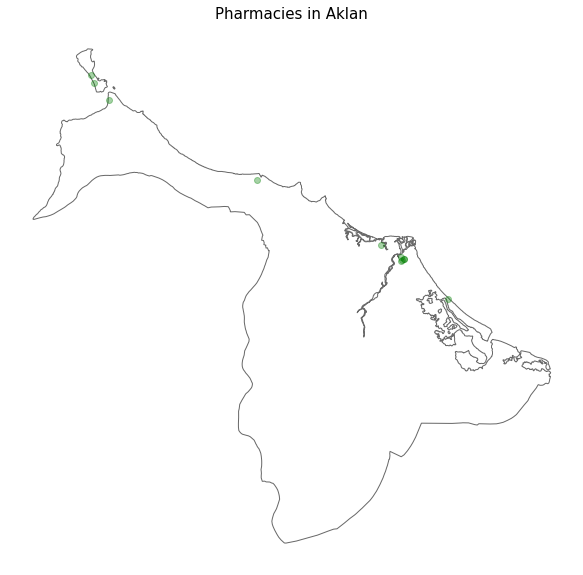

In [38]:
#Pharmacy
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_pharmacy.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Aklan', fontsize=15)
ax.axis('off')

(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

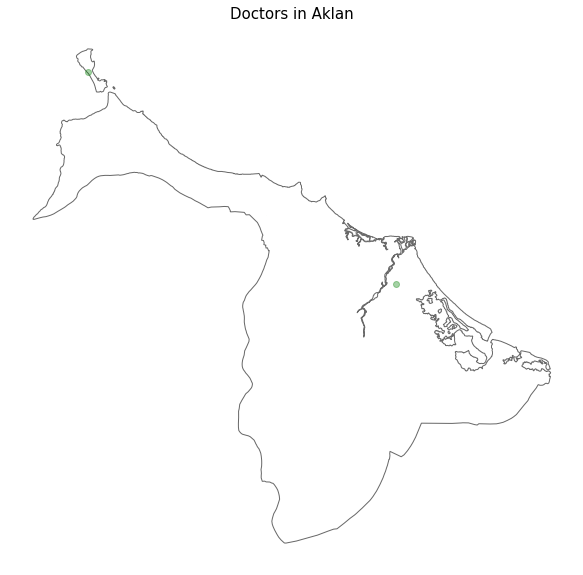

In [39]:
#Doctors
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_doctors.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Doctors in Aklan', fontsize=15)
ax.axis('off')

(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

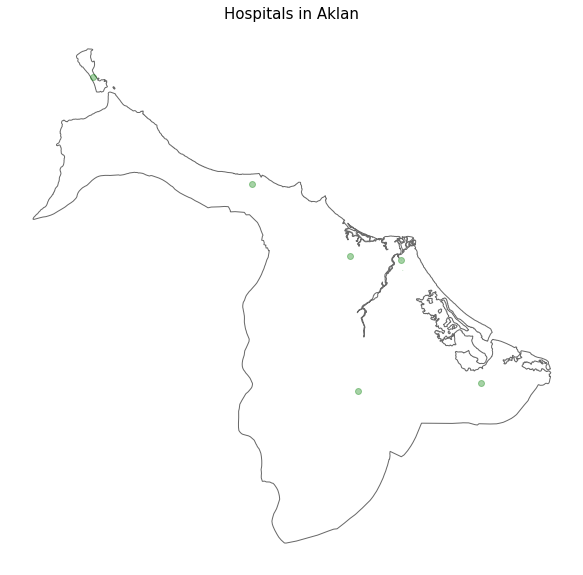

In [40]:
#Hospitals
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_hospital.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Hospitals in Aklan', fontsize=15)
ax.axis('off')

(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

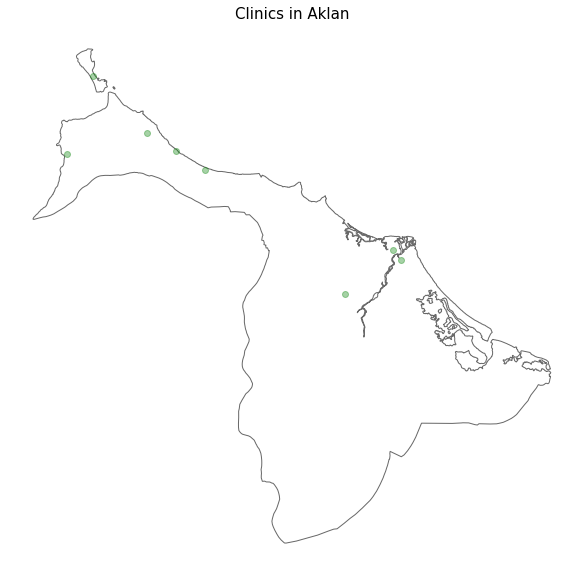

In [41]:
#Clinics
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_clinic.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Clinics in Aklan', fontsize=15)
ax.axis('off')

(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

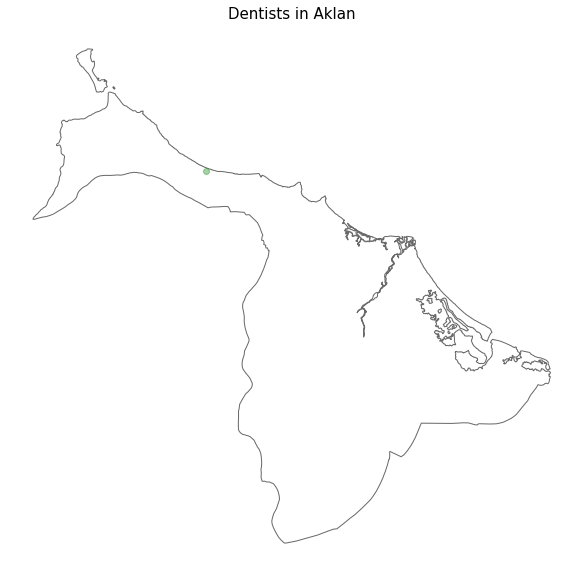

In [42]:
#Dentists
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_dentist.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Dentists in Aklan', fontsize=15)
ax.axis('off')

In [43]:
#Laboratories - NONE!
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_laboratory.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Laboratories in Aklan', fontsize=15)
ax.axis('off')

c:\users\richa\appdata\local\programs\python\python39\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 1440x720 with 1 Axes>

In [44]:
#Social Facilities - NONE!
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_sf.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Social Facilities in Aklan', fontsize=15)
ax.axis('off')

c:\users\richa\appdata\local\programs\python\python39\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 1440x720 with 1 Axes>

In [45]:
#Health Care - NONE!
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

aklan_map.plot(ax=ax, color='white', edgecolor='dimgray')
aklan_healthcare.plot(ax=ax, color="green", alpha=0.35, legend=True)
ax.set_title('Health Care Facilities in Aklan', fontsize=15)
ax.axis('off')

c:\users\richa\appdata\local\programs\python\python39\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


(121.8066558855, 122.6148376445, 11.278166485, 12.033503815)

posx and posy should be finite values


AttributeError: 'NoneType' object has no attribute 'extents'

<Figure size 1440x720 with 1 Axes>